In [171]:
import torch
import torch.nn as nn #nueral network for torch module
import torch.nn.functional as F #helps moving data thrrough the neurons

In [172]:
#creating the model class that inherits nn.Module

# class Model(nn.Module):
#   #inpt layer (13 attributes of the heart diagnosis)
#   #neuron layer l1-2-3-4 then goes to output
#   def __init__(self, in_features=13, l1=20,l2=40,l3=80,l4=40,out_features=13):
#     super().__init__()
#     self.fc1 = nn.Linear(in_features,l1)
#     self.fc2 = nn.Linear(l1,l2)
#     self.fc3 = nn.Linear(l2,l3)
#     self.fc4 = nn.Linear(l3,l4)
#     self.out = nn.Linear(l4,out_features)

#     def forward(self, x): #passes itself to the integer x
#       x = F.relu(self.fc1(x))
#       x = F.relu(self.fc2(x))
#       x = F.relu(self.fc3(x))
#       x = F.relu(self.fc4(x))
#       x = self.out(x)
#       return x


In [173]:
#creating a model class that inherits nn.Module
class Model(nn.Module):
  #input layer (13 reading of the heart disease diagnosis)
  #neuron layer 1 ->l2 then it goes to output
  def __init__(self, in_features=13, l1= 40, l2 = 80, l3 = 160, l4 = 320, out_features=10):
    super().__init__() #initiate our module
    self.fc1 = nn.Linear(in_features, l1) #fully connected inputs to first neuron layer
    self.fc2 = nn.Linear(l1, l2) # fully connected first neuron layer to second layer
    self.fc3 = nn.Linear(l2,l3)
    self.fc4 = nn.Linear(l3,l4)
    self.out = nn.Linear(l4, out_features) #output layer

  def forward(self, x): #passes itself to the integer x
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.out(x)

    return x




In [174]:
#picking manual seed for randomization
torch.manual_seed(41)

#calling the fucntion
model = Model()

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
from google.colab import files
url = '/content/heart_cleveland_upload.csv'
#uploaded = files.upload()
my_dataframe = pd.read_csv(url)
my_dataframe.head() ## displays the top of the Data set which is entered

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [177]:
#training the split model, setting X, y
X = my_dataframe.drop('condition', axis=1)
Y = my_dataframe['condition']

X = X.values
Y = Y.values

In [178]:
from sklearn.model_selection import train_test_split
#train test split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.6, random_state = 10)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [179]:
#setting the criterion of model to measure error
criterion = nn.CrossEntropyLoss()
#choosing the optimizer for the model and setting the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [180]:
#training the model now
epochs = 1000
losses = []

for i in range(epochs):
  Y_pred = model.forward(X_train)

  loss = criterion(Y_pred, Y_train)

  losses.append(loss.detach().numpy())

  if i % 100 ==0:
    print(f'epoch: {i} and loss {loss}')

  #doing back propagation; taking error rate and feeding it back to the network
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 and loss 3.173271894454956
epoch: 100 and loss 0.5060169100761414
epoch: 200 and loss 0.36186960339546204
epoch: 300 and loss 0.3122551441192627
epoch: 400 and loss 0.26801347732543945
epoch: 500 and loss 0.2516365051269531
epoch: 600 and loss 0.21859996020793915
epoch: 700 and loss 0.22368311882019043
epoch: 800 and loss 0.22991672158241272
epoch: 900 and loss 0.1063670739531517


Text(0.5, 0, 'epochs')

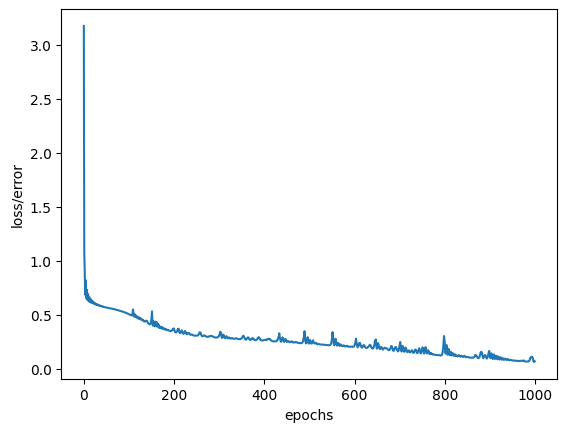

In [181]:
#graphing the losses out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")

In [182]:
#evaluating the model on test data set

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,Y_test)
  print(loss)

tensor(1.6400)


In [183]:
correct = 0
total_detected = 0
total_not_detected = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
   y_val = model.forward(data)

   if Y_test[i] == 0:
    x = 'no disease'
    total_not_detected +=1
   else:
    x = 'disease detected'
    total_detected +=1

   print(f'{i+1}. {str(y_val)} \t{x}  \t {y_val.argmax().item()}')

  if y_val.argmax().item() == Y_test[i]:
      correct += 1

      print(f'\t We got {correct} correct!')

print(f'\t Total detected Cases: {total_detected}')
print(f'\t Total not detected Cases: {total_not_detected}')
  #if Y_test[i] == 0:
  #   x = 'no disease'
  # else:
  #   x = 'disease detected'
  # print(f'{i+1}. {str(y_val)} \t{x}  \t {y_val.argmax().item()}')

  # #correct or not
  # if y_val.argmax().item() == Y_test[i]:
  #   correct += 1

  # print(f'\t We got {correct} correct!')

1. tensor([  7.3742,   2.5168, -12.5830, -10.4858, -10.7680, -11.6310, -11.5513,
        -11.8382, -11.4425, -11.9400]) 	no disease  	 0
2. tensor([  6.1645,   1.9924, -10.9343,  -9.0562,  -9.3950,  -9.6410, -10.2931,
         -9.7611,  -9.5255, -10.5084]) 	no disease  	 0
3. tensor([  3.3081,   5.0369, -12.2974, -10.2728,  -9.8643, -11.5059, -12.0741,
        -12.0661, -12.1767, -12.7048]) 	no disease  	 1
4. tensor([ 5.7336,  1.5271, -9.1015, -7.6680, -7.9875, -8.5748, -8.2743, -8.7375,
        -8.2489, -8.5075]) 	no disease  	 0
5. tensor([ -9.2697,  22.2060, -26.6781, -21.6909, -19.7787, -25.0271, -26.8535,
        -27.3965, -27.9353, -28.2727]) 	disease detected  	 1
6. tensor([  6.6636,   1.7144, -11.5371,  -9.7293,  -9.8895, -10.4194, -10.7208,
        -10.7083, -10.2520, -11.1430]) 	no disease  	 0
7. tensor([  0.1632,   8.3465, -12.7668, -10.4143,  -9.7997, -11.7882, -12.7109,
        -12.7901, -13.2046, -13.3007]) 	disease detected  	 1
8. tensor([ -2.4628,   9.5440, -12.9848

In [184]:
torch.save(model.state_dict(), 'heart_disease_diagnosis_model.pt')

In [186]:
new_model = Model()
new_model.load_state_dict(torch.load('heart_disease_diagnosis_model.pt'))

new_model.eval()

Model(
  (fc1): Linear(in_features=13, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=160, bias=True)
  (fc4): Linear(in_features=160, out_features=320, bias=True)
  (out): Linear(in_features=320, out_features=10, bias=True)
)